In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
surya = pd.read_csv('Fraud_check.csv')
surya

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
surya.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
surya.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [5]:
surya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
surya.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
surya.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
#sn.pairplot(surya)

In [9]:
surya.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [10]:
surya=surya.rename(columns={"Marital.Status" : "Marital Status", "Taxable.Income" : "Income", 'City.Population' : "Population",
       'Work.Experience' : "Experience"})

In [11]:
surya

,Undergrad,Marital Status,Income,Population,Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [12]:
surya=pd.get_dummies(surya,columns=['Undergrad','Marital Status','Urban'],drop_first=True)

In [13]:
surya

,Income,Population,Experience,Undergrad_YES,Marital Status_Married,Marital Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [14]:
for labels in range(0,len(surya['Income'])):
    if surya['Income'].iloc[labels]<=30000:
        surya['Income'].iloc[labels]='Risky'
    else:
        surya['Income'].iloc[labels]='Good'

<ipython-input-14-3734d18830d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surya['Income'].iloc[labels]='Good'


In [15]:
surya

,Income,Population,Experience,Undergrad_YES,Marital Status_Married,Marital Status_Single,Urban_YES
0,Good,50047,10,0,0,1,1
1,Good,134075,18,1,0,0,1
2,Good,160205,30,0,1,0,1
3,Good,193264,15,1,0,1,1
4,Good,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,Good,39492,7,1,0,0,1
596,Good,55369,2,1,0,0,1
597,Good,154058,0,0,0,0,1
598,Good,180083,17,1,1,0,0


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [17]:
surya_ = sc.fit_transform(surya.iloc[:,1:])

In [18]:
surya_stand = pd.DataFrame(surya_)

In [19]:
surya_stand

,0,1,2,3,4,5
0,-1.178521,-0.629143,-1.040833,-0.691254,1.328524,0.993355
1,0.508500,0.276370,0.960769,-0.691254,-0.752715,0.993355
2,1.033109,1.634639,-1.040833,1.446646,-0.752715,0.993355
3,1.696831,-0.063197,0.960769,-0.691254,1.328524,0.993355
4,-1.630532,1.408261,-1.040833,1.446646,-0.752715,-1.006689
...,...,...,...,...,...,...
595,-1.390432,-0.968710,0.960769,-0.691254,-0.752715,0.993355
596,-1.071672,-1.534655,0.960769,-0.691254,-0.752715,0.993355
597,0.909696,-1.761033,-1.040833,-0.691254,-0.752715,0.993355
598,1.432197,0.163181,0.960769,1.446646,-0.752715,-1.006689


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x= surya_stand.iloc[:,0:6]
y = surya['Income']

In [22]:
x

,0,1,2,3,4,5
0,-1.178521,-0.629143,-1.040833,-0.691254,1.328524,0.993355
1,0.508500,0.276370,0.960769,-0.691254,-0.752715,0.993355
2,1.033109,1.634639,-1.040833,1.446646,-0.752715,0.993355
3,1.696831,-0.063197,0.960769,-0.691254,1.328524,0.993355
4,-1.630532,1.408261,-1.040833,1.446646,-0.752715,-1.006689
...,...,...,...,...,...,...
595,-1.390432,-0.968710,0.960769,-0.691254,-0.752715,0.993355
596,-1.071672,-1.534655,0.960769,-0.691254,-0.752715,0.993355
597,0.909696,-1.761033,-1.040833,-0.691254,-0.752715,0.993355
598,1.432197,0.163181,0.960769,1.446646,-0.752715,-1.006689


In [23]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Income, Length: 600, dtype: object

In [24]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [25]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[3] <= 0.378\nentropy = 0.73\nsamples = 480\nvalue = [382, 98]'),
 Text(0.25, 0.625, 'x[1] <= 1.578\nentropy = 0.685\nsamples = 324\nvalue = [265, 59]'),
 Text(0.125, 0.375, 'x[1] <= 0.899\nentropy = 0.666\nsamples = 311\nvalue = [257, 54]'),
 Text(0.0625, 0.125, 'entropy = 0.715\nsamples = 244\nvalue = [196, 48]'),
 Text(0.1875, 0.125, 'entropy = 0.435\nsamples = 67\nvalue = [61, 6]'),
 Text(0.375, 0.375, 'x[0] <= 0.247\nentropy = 0.961\nsamples = 13\nvalue = [8, 5]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.863\nsamples = 7\nvalue = [2, 5]'),
 Text(0.75, 0.625, 'x[0] <= 1.374\nentropy = 0.811\nsamples = 156\nvalue = [117, 39]'),
 Text(0.625, 0.375, 'x[0] <= 1.348\nentropy = 0.847\nsamples = 135\nvalue = [98, 37]'),
 Text(0.5625, 0.125, 'entropy = 0.831\nsamples = 133\nvalue = [98, 35]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.375, 'x[0] <= 1.679\nentropy = 0.4

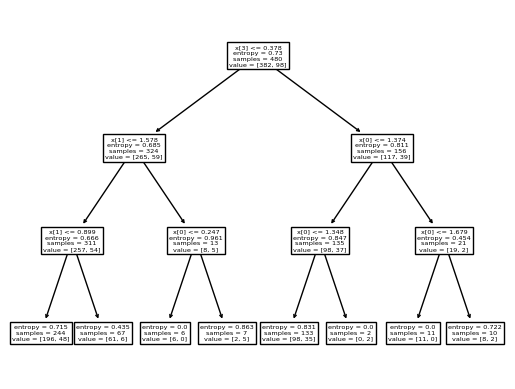

In [26]:
import warnings
warnings.filterwarnings('ignore')
tree.plot_tree(model)

In [27]:
surya.columns

Index(['Income', 'Population', 'Experience', 'Undergrad_YES',
       'Marital Status_Married', 'Marital Status_Single', 'Urban_YES'],
      dtype='object')

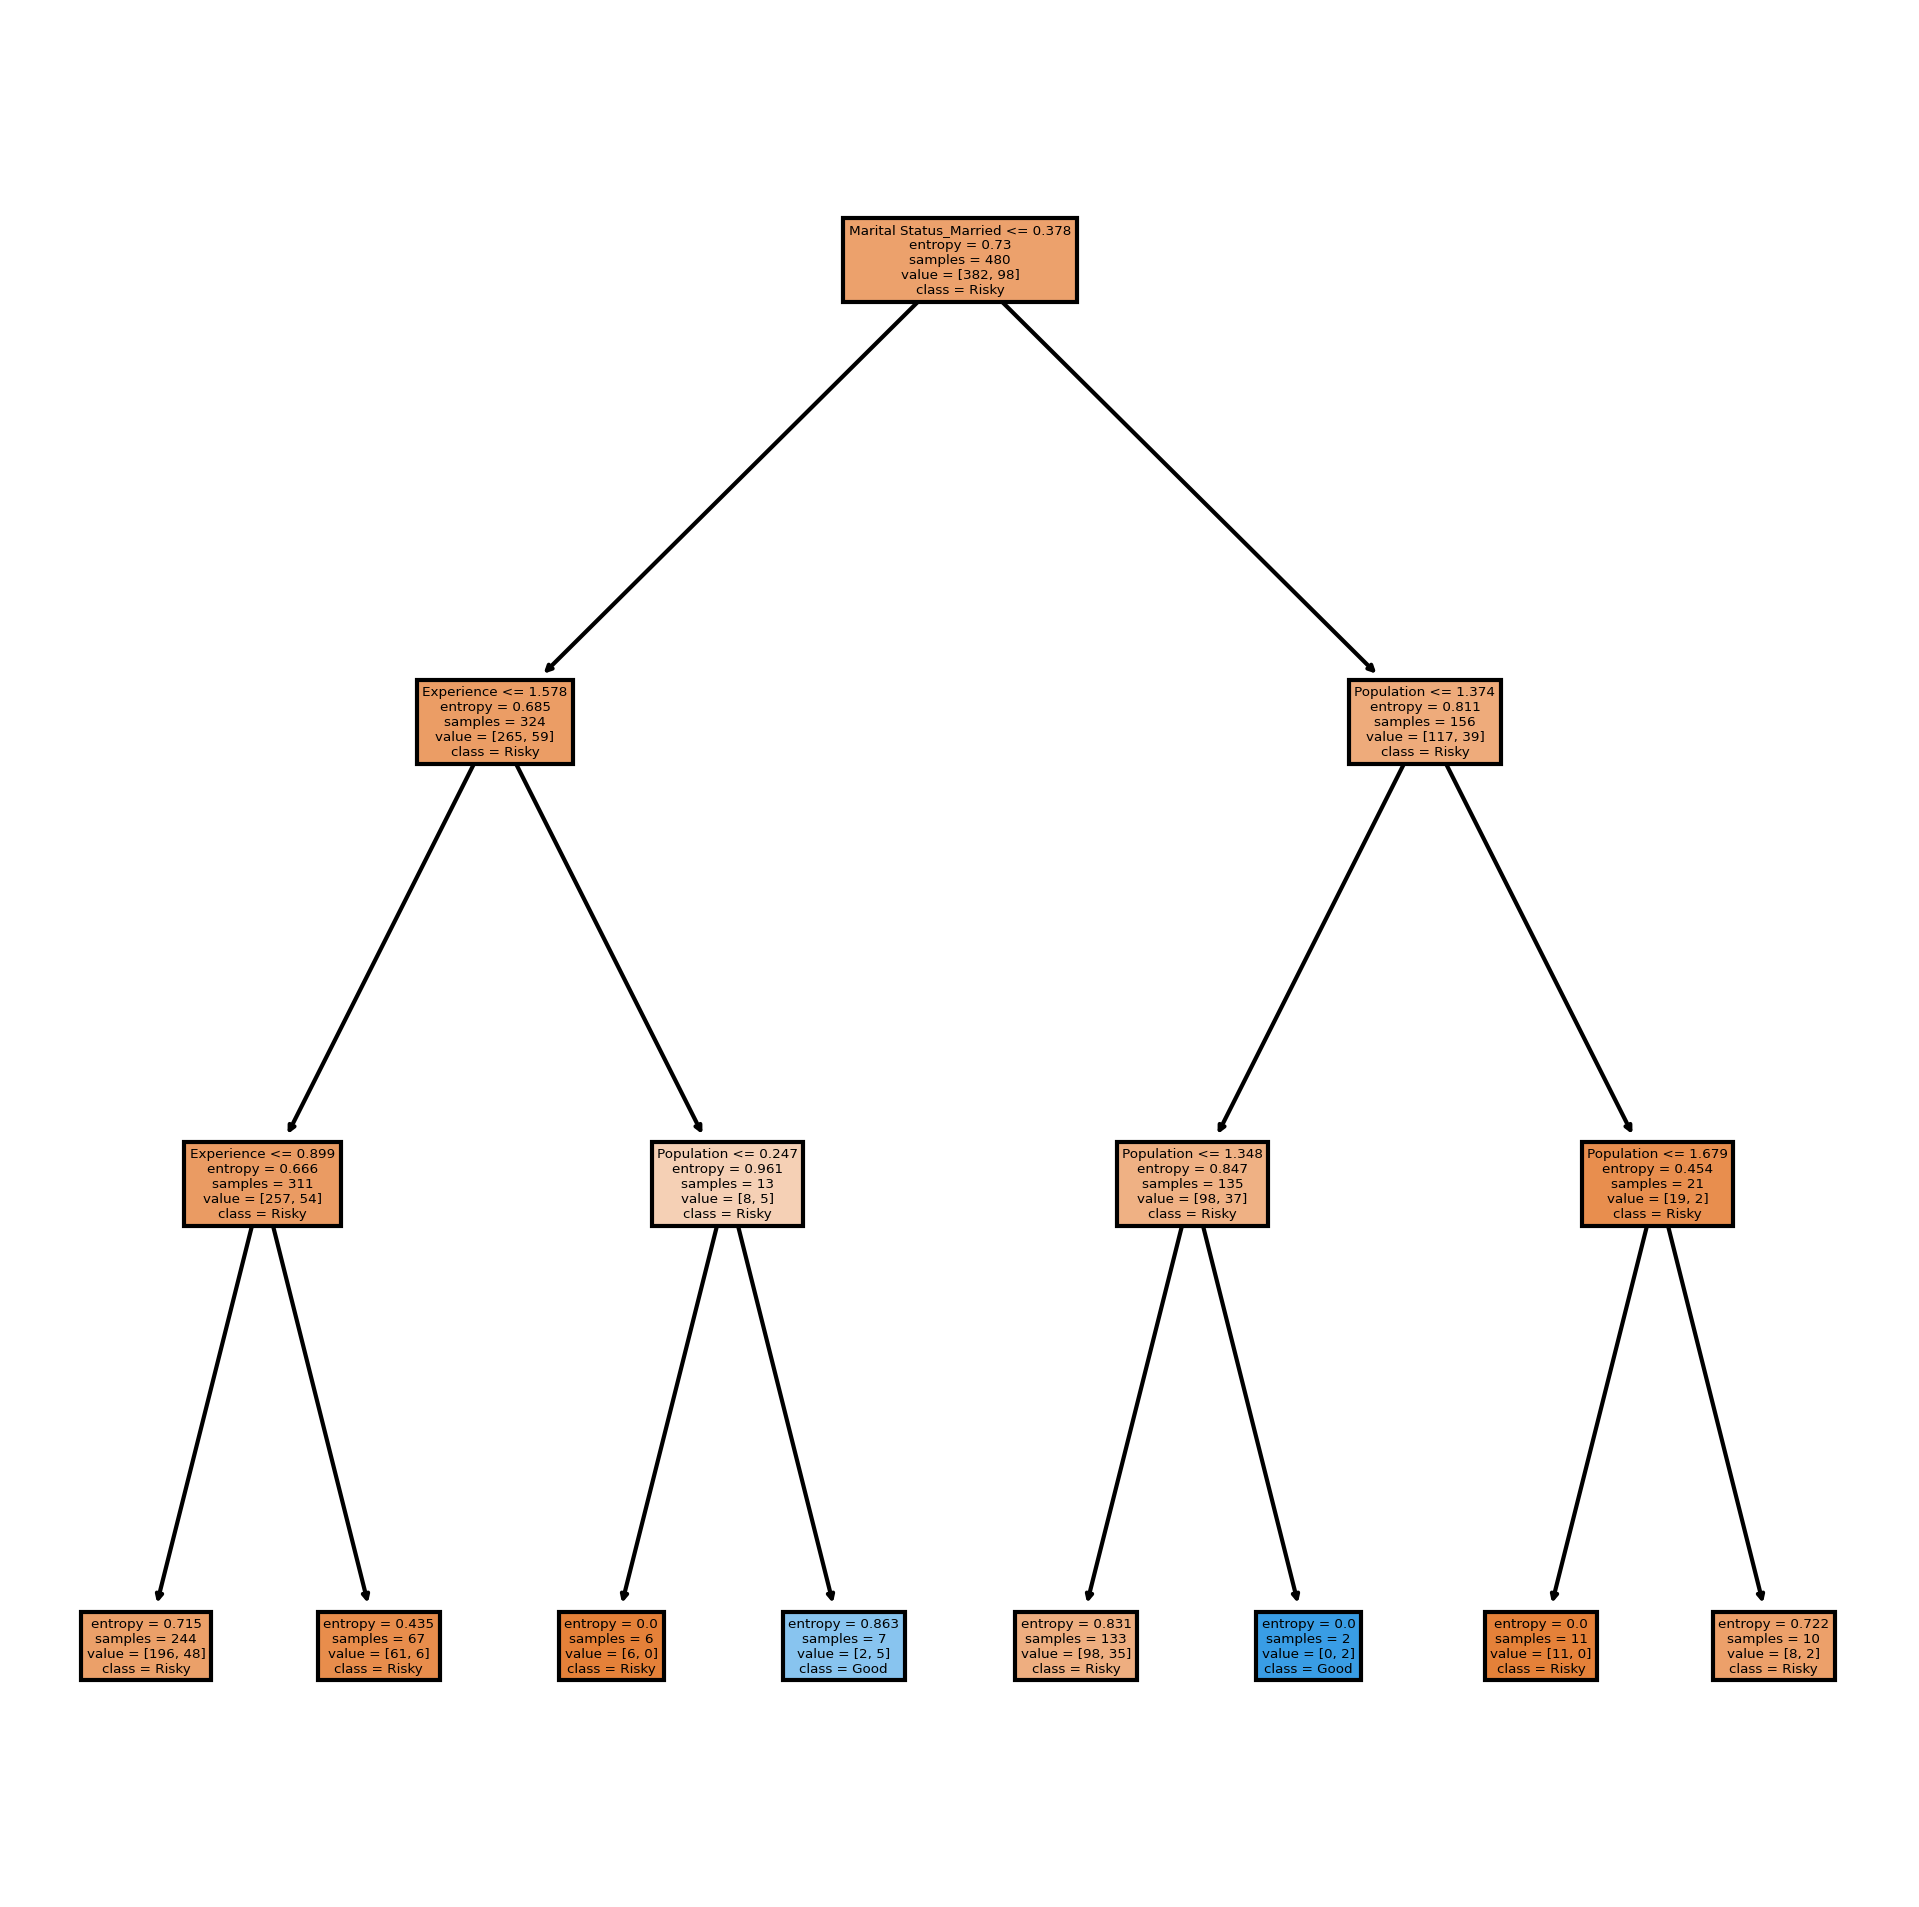

In [28]:
fn=['Population', 'Experience', 'Undergrad_YES',
       'Marital Status_Married', 'Marital Status_Single', 'Urban_YES']
cn= ['Risky','Good']

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(8,8),dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [29]:
model.feature_importances_

array([0.66240636, 0.24599043, 0.        , 0.09160321, 0.        ,
       0.        ])

In [30]:
preds= model.predict(X_test)
pd.Series(preds).value_counts()

Good     119
Risky      1
dtype: int64

In [31]:
pd.crosstab(y_test,preds)

col_0,Good,Risky
Income,,
Good,93,1
Risky,26,0


In [32]:
np.mean(preds==y_test)

0.775

In [33]:
model = DecisionTreeClassifier(criterion='gini',max_depth = 3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
pred=model.predict(X_test)

In [35]:
pd.Series(pred).value_counts()

Good     119
Risky      1
dtype: int64

In [36]:
np.mean(pred==y_test)

0.775